In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("/content/gdrive/My Drive/tweetsConvereted2017_toxicPerspectiveScore.csv")

In [4]:
groupDf = df[['user_id', 'Toxicity']]

In [5]:
groupDf.head()

,user_id,Toxicity
0,4746709454,0.052305
1,4746709454,0.068171
2,4746709454,0.518691
3,773711528398848000,0.010681
4,773711528398848000,0.018975


In [6]:
groupedDf = groupDf.groupby(['user_id']).agg({'Toxicity': 'mean'}).reset_index()

In [7]:
groupedDf['Toxicity'] = groupedDf['Toxicity'] * 10
groupedDf['Toxicity'] = (groupedDf['Toxicity'].apply(np.ceil)) / 10

In [8]:
groupedDf.head()

,user_id,Toxicity
0,12,0.1
1,278,0.2
2,541,0.2
3,586,0.1
4,633,0.1


In [9]:
toxicity_counts = groupedDf['Toxicity'].value_counts().sort_index()
toxicity_dict = toxicity_counts.to_dict()

In [14]:
toxicity_counts

0.1    38413
0.2    15388
0.3     4946
0.4      929
0.5      124
0.6       34
0.7        7
0.8        5
0.9        1
1.0        1
Name: Toxicity, dtype: int64

In [15]:
toxicity_counts.sum()

59848

In [10]:
toxicity_range = list(toxicity_dict.keys())
user_counts = list(toxicity_dict.values())

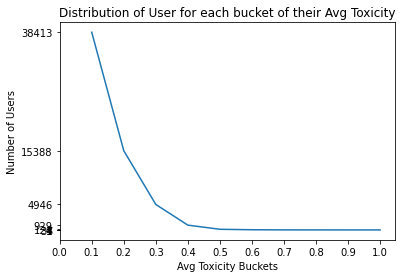

In [17]:
plt.plot(toxicity_range, user_counts)
plt.xlabel('Avg Toxicity Buckets')
plt.ylabel('Number of Users')
plt.title('Distribution of User for each bucket of their Avg Toxicity')
plt.xticks([i/10 for i in range(0, 11)])
# plt.yticks(list(toxicity_dict.values()))
plt.show()

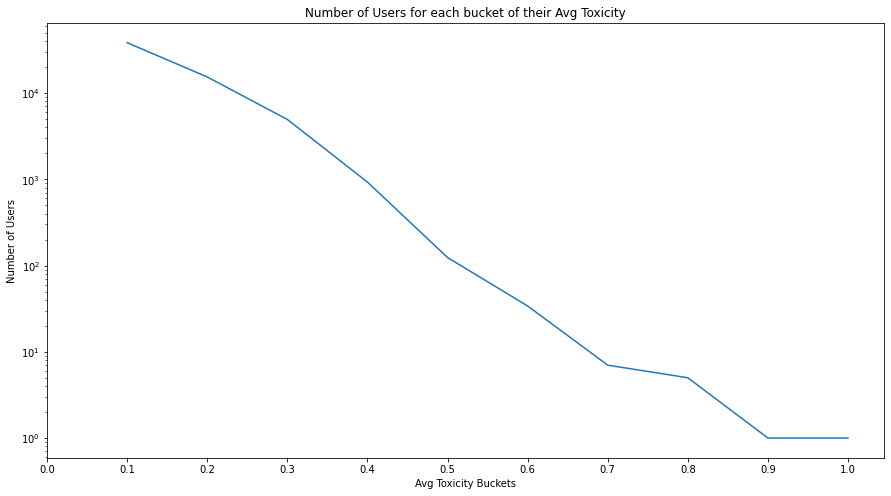

In [19]:
plt.figure(figsize=(15,8))
plt.semilogy(toxicity_range, user_counts)
plt.xlabel('Avg Toxicity Buckets')
plt.ylabel('Number of Users')
plt.title('Number of Users for each bucket of their Avg Toxicity')
plt.xticks([i/10 for i in range(0, 11)])
# plt.yticks(list(toxicity_dict.values()))
plt.show()